In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection,  pathpatch_2d_to_3d
from matplotlib.patches import Polygon

%matplotlib widget

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


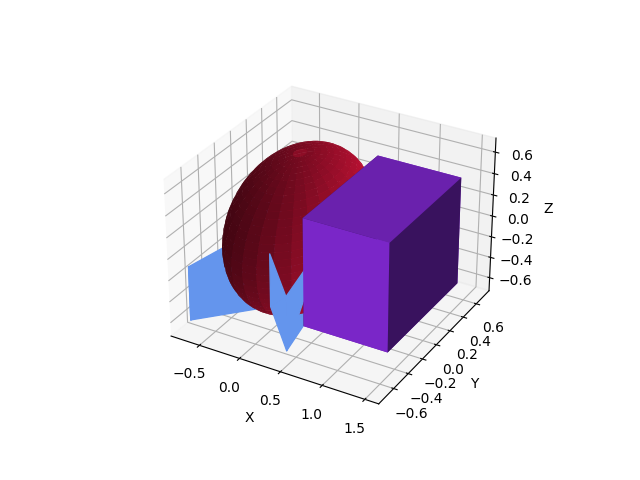

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

def draw_box(size, center=(0,0,0), ax=None):
    if ax is None:
        ax = plt.axes(projection='3d')

    x0, y0, z0 = center
    Lx, Ly, Lz = size
    xmin = x0 - Lx/2
    ymin = y0 - Ly/2
    zmin = z0 - Lz/2
    xmax = x0 + Lx/2
    ymax = y0 + Ly/2
    zmax = z0 + Lz/2

    color = 'blueviolet'
    
    xbounds = [xmin, xmax]
    ybounds = [ymin, ymax]
    zbounds = [zmin, zmax]
    
    
    Xxy, Yxy = np.meshgrid(xbounds, ybounds)
    ones = np.ones_like(Xxy)

    ax.plot_surface(Xxy, Yxy, zmax*ones, color=color)
    ax.plot_surface(Xxy, Yxy, zmin*ones, color=color)

    Xxz, Zxz = np.meshgrid(xbounds, zbounds)

    ax.plot_surface(Xxz, ymax*ones, Zxz, color=color)
    ax.plot_surface(Xxz, ymin*ones, Zxz, color=color)

    Yyz, Zyz = np.meshgrid(ybounds, zbounds)

    ax.plot_surface(xmin*ones, Yyz, Zxz, color=color)
    ax.plot_surface(xmax*ones, Yyz, Zxz, color=color)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return ax

def draw_sphere(radius, center=(0,0,0), ax=None):
    if ax is None:
        ax = plt.axes(projection='3d')
    x0, y0, z0 = center
    phis = np.linspace(0, 2*np.pi, 55)
    thetas = np.linspace(0, np.pi, 70)
    u, v = np.meshgrid(phis, thetas)
    x = x0 + radius * np.cos(u)*np.sin(v)
    y = y0 + radius * np.sin(u)*np.sin(v)
    z = z0 + radius * np.cos(v)
    ax.plot_surface(x, y, z, color="crimson")
    return ax

def draw_cylinder(radius, length, center=(0,0,0), ax=None):
    if ax is None:
        ax = plt.axes(projection='3d')
    x0, y0, z0 = center
    phis = np.linspace(0, 2*np.pi, 55)
    thetas = np.linspace(0, np.pi, 70)
    zs = np.linspace(z0 - length/2, z0 + length/2, 50)
    u, v, z = np.meshgrid(phis, thetas, zs)
    x = x0 + radius * np.cos(u)*np.sin(v)
    y = y0 + radius * np.sin(u)*np.sin(v)
    ax.plot_surface(x, y, z, color="firebrick")
    return ax

def draw_polyslab(vertices, slab_bounds, ax=None):
    if ax is None:
        ax = plt.axes(projection='3d')
        
    color = 'cornflowerblue'

    zmin, zmax = slab_bounds
    
    vertices_f = np.roll(vertices, shift=-1, axis=0)
    for (x, y), (xf, yf) in zip(vertices, vertices_f):
        vertices_side = np.array([[x, y, zmin], [xf, yf, zmin], [xf, yf, zmax]])
        ax.add_collection3d(Poly3DCollection(vertices_side, closed=True, color=color))
        vertices_side = np.array([[xf, yf, zmax], [x, y, zmax], [x, y, zmin]])

        ax.add_collection3d(Poly3DCollection(vertices_side, closed=True, color=color))

    vertices = np.array(vertices)
    polygon_top = Polygon(vertices, facecolor=color)
    polygon_bot = Polygon(vertices, facecolor=color)
    
    ax.add_patch(polygon_top)
    ax.add_patch(polygon_bot)

    pathpatch_2d_to_3d(polygon_top, z=zmin, zdir='z')
    pathpatch_2d_to_3d(polygon_bot, z=zmax, zdir='z')
        
    return ax



ax = draw_box(size=(1,1,1), center=(1,0,0), ax=ax)
ax = draw_sphere(radius=.7, center=(0,0,0), ax=ax)

# inner and outer radii of star
r_in = 0.4
r_out = 1.0

# inner and outer star vertices
inner_vertices = [(r_in * np.cos(2*np.pi*i/5 + np.pi/2 - np.pi/5), r_in * np.sin(2*np.pi*i/5 + np.pi/2 - np.pi/5)) for i in range(5)]
outer_vertices = [(r_out * np.cos(2*np.pi*i/5 + np.pi/2), r_out * np.sin(2*np.pi*i/5 + np.pi/2)) for i in range(5)]

# interweave inner and outer vertices to make star
star_vertices = []
for i in range(5):
    star_vertices.append(inner_vertices[i])
    star_vertices.append(outer_vertices[i])

ax = draw_polyslab(vertices=star_vertices, slab_bounds=(-.5, 0), ax=ax)
# ax = draw_cylinder(radius=.5, length=2, ax=ax)



# ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
import tidy3d as td

s = td.Simulation(
    size=(3,3,1),
    grid_size=(.5, .5, .5),
)

r = td.Sphere(radius=1)

# prepare some coordinates
(xmin, ymin, zmin), (xmax, ymax, zmax) = s._get_bounds()
xs = np.arange(xmin, xmax, s.grid_size[0])
ys = np.arange(ymin, ymax, s.grid_size[1])
zs = np.arange(zmin, zmax, s.grid_size[2])


x, y, z = np.meshgrid(xs, ys, zs, indexing='ij')

# draw cuboids in the top left and bottom right corners, and a link between
# them
# cube1 = (x < 3) & (y < 3) & (z < 3)
# cube2 = (x >= 5) & (y >= 5) & (z >= 5)
# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

is_in = r._is_inside(x,y,z)

# combine the objects into a single boolean array
# voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(is_in.shape, dtype=object)
colors[is_in] = 'red'
# colors[cube1] = 'blue'
# colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(is_in, facecolors=colors, edgecolor='k')

limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
ax.set_box_aspect(np.ptp(limits, axis = 1))

# ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))  # aspect ratio is 1:1:1 in data space

plt.show()

KeyboardInterrupt: 